
<b>Background:</b> In end user perspective, travel and tourism is mostly explorative in nature and repetitive travels to same locations are minimal. So, travellers have to take decisions regarding their destinations and associated facilities to be consumed without adequate prior or personal knowledge. The best option available is to leverage social media and internet. Tourism recommenders are the best solutions in this scenario.<br>

<b>Dataset file name:</b> tripadvisor_review.csv</br>

<b>Dataset description:</b> User’s average feedback/rating information on 10 categories of attractions in East Asia captured from tripadvisor.com. Dataset contains 980 user records with 10 feedback attributes inferred from numerous destination reviews.<br>

1. Apply component factor- and projection-based dimensionality reduction approaches on the given dataset (tripadvisor_review.csv) for creating three collective variables using <b>UMAP</b>.<br>
    Does this new feature space improve the grouping of travellers compared to original dataset?<br>
    Present your results with appropriate evidence.<br><br>
2. Let’s consider the data shown in the Figure 1.<br>
    a. Is it possible to obtain the cluster shown in the figure by DBSCAN? Provide evidence including code and explanation to justify your findings.<br>
    b. Explore state-of-the-art clustering methods (explore recent research articles) that can produce better results than DBSCAN for this problem? Describe the selected approach, evaluate performance and report your findings.<br><br>
    
    
<b>Background</b><br>
The recently started human and other genome projects are likely to change the situation of molecular biology. Comprehensive analyses of whole genomic sequences will enable us to understand the general mechanisms of how protein and nucleic acid functions are encoded in the sequence data.<br>

<b>Dataset filename:</b> yeast2vs4.csv<br>

<b>Dataset description:</b> There are 8 features and one target in the dataset. All the features are in a numerical format, and the target is in text format. For further information about the attributes, please read “Data Set Information.pdf”.<br>

3. Build three ensemble models (including voting classifier) for predicting presence or absence of protein.<br>
    a. When do you want to use ensemble models over other ML models? Explain with the context of this problem.<br>
    b. What are the similarities or differences between these models?<br>
    c. Is there any preferable scenario for using any specific model among the set of ensemble models?<br>
    d. Is it possible to build ensemble model using ML classifiers other than decision tree? If yes, then explain with an example.<br>

## <u>Solution</u>

1. Apply component factor- and projection-based dimensionality reduction approaches on the given dataset (tripadvisor_review.csv) for creating three collective variables using UMAP.
    Does this new feature space improve the grouping of travellers compared to original dataset?
    Present your results with appropriate evidence.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
trip_df = pd.read_csv('tripadvisor_review.csv')
trip_df

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [3]:
trip_df.shape

(980, 11)

we have 980 data values and 11 features

In [4]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [5]:
trip_df.isnull().sum()

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

From above two cells we can see there is no null values and all features are in float value. The feature 'User ID' might be removed because it might not convey any meaning.

In [6]:
trip_df.describe().T #5 point summary

,count,mean,std,min,25%,50%,75%,max
Category 1,980.0,0.893194,0.326912,0.34,0.67,0.83,1.0200,3.22
Category 2,980.0,1.352612,0.478280,0.00,1.08,1.28,1.5600,3.64
Category 3,980.0,1.013306,0.788607,0.13,0.27,0.82,1.5725,3.62
Category 4,980.0,0.532500,0.279731,0.15,0.41,0.50,0.5800,3.44
Category 5,980.0,0.939735,0.437430,0.06,0.64,0.90,1.2000,3.30
Category 6,980.0,1.842898,0.539538,0.14,1.46,1.80,2.2000,3.76
Category 7,980.0,3.180939,0.007824,3.16,3.18,3.18,3.1800,3.21
Category 8,980.0,2.835061,0.137505,2.42,2.74,2.82,2.9100,3.39
Category 9,980.0,1.569439,0.364629,0.74,1.31,1.54,1.7600,3.17
Category 10,980.0,2.799224,0.321380,2.14,2.54,2.78,3.0400,3.66


Cant observe any skewness. From the data view we can observe there is no target variable so this is clustering problem.

In [7]:
#lets remove the feature 'User ID'
X = trip_df.drop(columns='User ID')


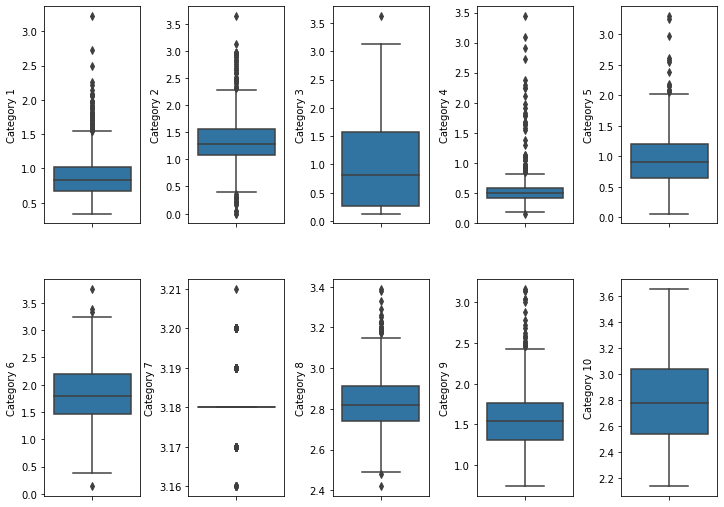

In [8]:
#Checking for outliers 
fig,axes = plt.subplots(2,5,figsize=(10, 7))
index =0
axes=axes.flatten()
for j in X:
    sns.boxplot(y=j,data=X,ax=axes[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0) 

There are observable outliers in the dataset.

In [9]:
#Lets scale our data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#Lets import umap for dimensionality reduction
import umap

u_model = umap.UMAP(n_components=3, random_state=8) #no of components was given as 3
u_reduced = u_model.fit_transform(X_scaled)

Now since our features has been reduced using UMAP lets compare the before and after of grouping of our datavalues.<br>

We are using KMeans for clustering/grouping the data

In [11]:
from sklearn.cluster import KMeans

#First do clustering to original data.
k_original = KMeans(n_clusters=2,random_state=8)
k_original_predict = k_original.fit_predict(X_scaled)

In [12]:
#clustering of umapped data.
k_reduced = KMeans(n_clusters=2,random_state=8)
k_reduced_predict = k_reduced.fit_predict(u_reduced)

The kmeans value can be found using tuning or elbow methods but here we are using 2. 

In [13]:
#Now lets evaluate the models. For that we are using Silhouette Score

from sklearn.metrics import silhouette_score

s_original = silhouette_score(X_scaled,k_original_predict)
s_reduced = silhouette_score(u_reduced,k_reduced_predict)

print("Silhouette Score (Original Dataset):", s_original)
print("Silhouette Score (UMAP Features):", s_reduced)

Silhouette Score (Original Dataset): 0.21315362778467906
Silhouette Score (UMAP Features): 0.42883947


We can clearly see from the silhouette score that the original dataset value got increased when dimensional reduction using UMAP.<br>
Now lets visualize the above data and prove UMAP has improved grouping of travellers.

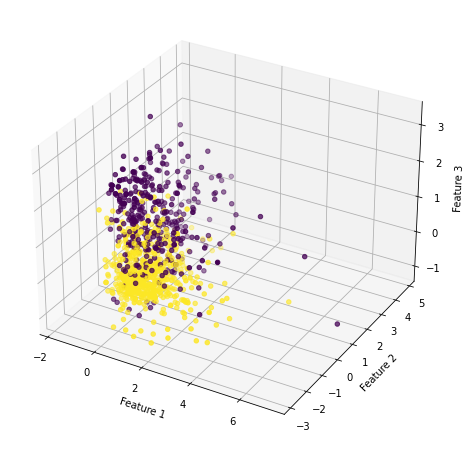

In [14]:
#Now lets visualize the data
#Plotting the scatterplot of first 3 components of the original scaled dataset,we are using 3 because of limitaion
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],c=k_original_predict)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

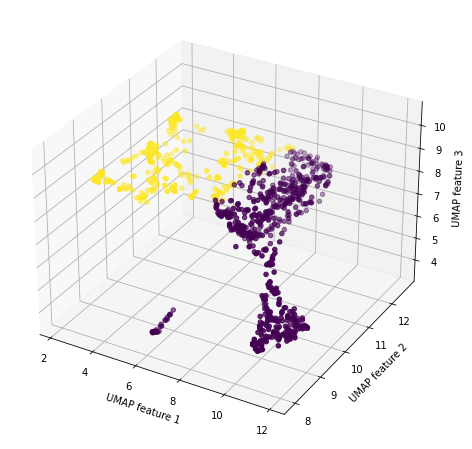

In [15]:
#Now lets visualize the data
#Plotting the scatterplot of first 3 components of the UMAP reduced data in a 3d plot.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(u_reduced[:,0], u_reduced[:,1], u_reduced[:,2],c=k_reduced_predict)
ax.set_xlabel('UMAP feature 1')
ax.set_ylabel('UMAP feature 2')
ax.set_zlabel('UMAP feature 3')
plt.show()

Now lets plot different silhouette scores for both original features and UMAP features.

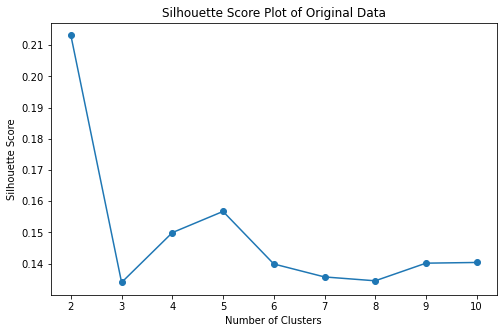

In [16]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=8)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score Plot of Original Data")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

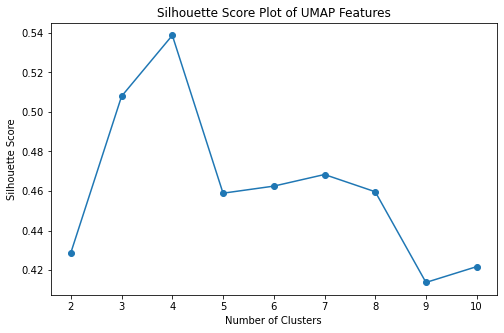

In [17]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=8)
    clusters = kmeans.fit_predict(u_reduced)
    silhouette = silhouette_score(u_reduced, clusters)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score Plot of UMAP Features")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

It is evident that silhouette score has increased drastically due to the UMAP features.

2. Let’s consider the data shown in the Figure 1. 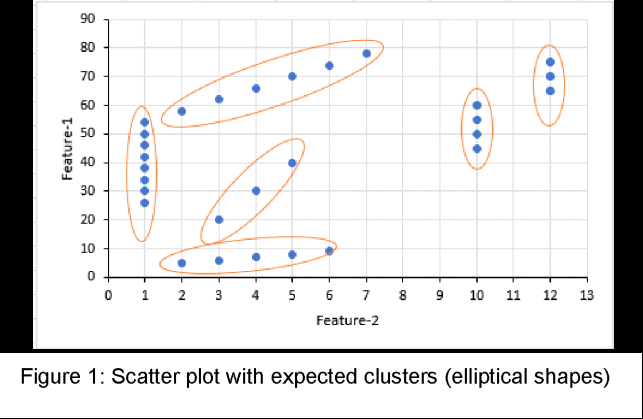<br>
    a. Is it possible to obtain the cluster shown in the figure by DBSCAN? Provide evidence including code and explanation to justify your findings.


In [18]:
#Lets plot the graph from ground
x_var = np.concatenate((np.linspace(25, 55, num = 8),
                        np.linspace(59, 79, num = 6),
                        np.linspace(20, 40, num = 3),
                        np.linspace(5, 10, num = 5),
                        np.linspace(45, 60, num = 4),
                        np.linspace(65, 75, num = 3) ), axis= None)

y_var = np.concatenate( ( np.ones(shape = 8), 
                         np.linspace(2, 7, num = 6),
                         np.linspace(3, 5, num = 3),
                        np.linspace(2, 6, num = 5),
                         np.ones(4) * 10, np.ones(3) * 12), axis=None )

plot_data = pd.DataFrame({'Feature-1': x_var, 'Feature-2': y_var})

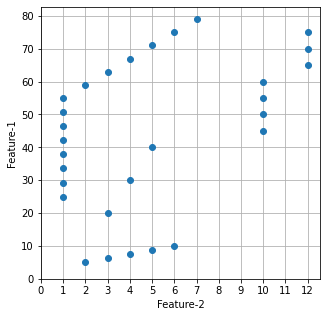

In [19]:
plt.figure(figsize=(5,5))
plt.grid()
plt.plot(plot_data['Feature-2'], plot_data['Feature-1'], 'o')
plt.xlabel('Feature-2')
plt.xticks(np.arange(0, 13, 1))
plt.ylabel('Feature-1')
plt.yticks(np.arange(0, 90, 10))
plt.show()

We have recreated the image in the question now lets check for the DBSCAN to get the clusters as shown

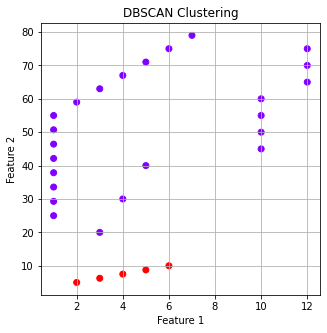

In [20]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)  # These parameters might need adjustment
plot_data['Cluster'] = dbscan.fit_predict(plot_data.iloc[:,:2])
# Visualize the clusters
plt.figure(figsize=(5,5))
plt.scatter(x=plot_data['Feature-2'],y= plot_data['Feature-1'], c=plot_data['Cluster'], cmap='rainbow', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.grid(True)
plt.show()

The optimum value for eps and min_samples need to be found to get 6 clusters as shown in the figure. There are some methods that can get some optimum values. They are:

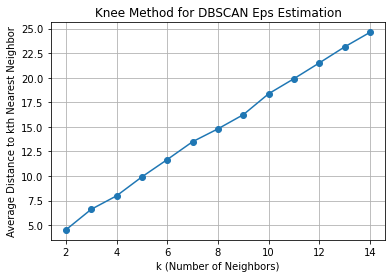

In [21]:
from sklearn.neighbors import NearestNeighbors

# Calculate distances to kth nearest neighbors
k_values = np.arange(2, 15)
distances = []

for k in k_values:
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(plot_data.iloc[:,:2])
    distances.append(np.mean(nbrs.kneighbors()[0][:, -1]))

# Plot the distances
plt.plot(k_values, distances, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Distance to kth Nearest Neighbor')
plt.title('Knee Method for DBSCAN Eps Estimation')
plt.grid(True)
plt.show()

In [22]:
np.sort(distances)

array([ 4.52246202,  6.61531863,  7.98729135,  9.91582277, 11.67916764,
       13.49745673, 14.80635977, 16.2463699 , 18.3792758 , 19.91318446,
       21.51809101, 23.15094398, 24.63088518])

We have used KNearestNeighbor to find the distance between data points. We plotted it to find the elbow and we can see there is a small change at 4 , for correct value we printed the distances

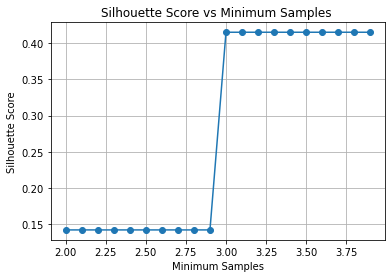

Best min_samples: 3.000000000000001


In [23]:
#Next tried range of min sample values to get best silhouette score

min_samples = np.arange(2,4, 0.1)
silhouette_scores = []

for ms in min_samples:
    dbscan = DBSCAN(eps=4.52246202, min_samples=ms)
    plot_data['Cluster'] = dbscan.fit_predict(plot_data.iloc[:,:2])
    num_clusters = len(np.unique(plot_data['Cluster']))
    
    # Calculate silhouette score (only if there are multiple clusters)
    if num_clusters > 1:
        silhouette_avg = silhouette_score(plot_data.iloc[:,:2], plot_data['Cluster'])
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Negative value for single-cluster case

# Plot silhouette scores for different min_samples values
plt.plot(min_samples, silhouette_scores, marker='o')
plt.xlabel('Minimum Samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Minimum Samples ')
plt.grid(True)
plt.show()

# Find the index of the maximum silhouette score
best_min_index = np.argmax(silhouette_scores)
best_min = min_samples[best_min_index]

print(f"Best min_samples: {best_min}")

Above we have used a range of min_samples to find optimum one.

<br>We got best eps and min_samples lets plot this and check if we are getting 6 clusters or not

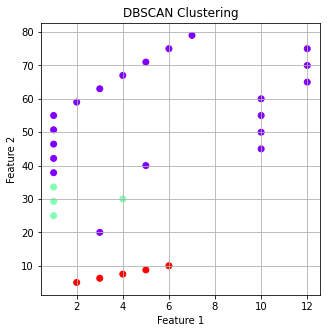

In [24]:
dbscan = DBSCAN(eps=4.52246202, min_samples=3.000000000000001)  # These parameters might need adjustment
plot_data['Cluster'] = dbscan.fit_predict(plot_data.iloc[:,:2])
# Visualize the clusters
plt.figure(figsize=(5,5))
plt.scatter(x=plot_data['Feature-2'],y= plot_data['Feature-1'], c=plot_data['Cluster'], cmap='rainbow', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.grid(True)
plt.show()

As we can see still we are not able to produce 6 clusters using DBSCAN, so it might not be possible. We have to use other methods to attain it.

There are certain limitations for DBSCAN to perform this.<br>
* DBSCAN has two key parameters: eps (epsilon) and min_samples. The performance of DBSCAN can be highly sensitive to the choice of these parameters. Selecting inappropriate values may lead to either overly sparse or overly dense clusters, or it might consider all points as noise.<br>
* DBSCAN struggles when dealing with clusters of varying densities. It might not be able to effectively distinguish between clusters with significantly different densities, leading to the formation of a single cluster containing both dense and sparse regions.<br>
* DBSCAN assumes that clusters are dense and connected. It might struggle with identifying clusters that have complex shapes or non-convex boundaries, as it relies on the concept of density reachability, which could miss parts of a cluster if there's a low-density gap.<br>
* If the separation between clusters is small compared to the eps parameter, DBSCAN might merge them into a single cluster. This is particularly true when the parameter min_samples is set too low.<br>

And for our problem the figure is having variying cluster densities, the clusters are close together which will be treated as a single cluster. So DBSCAN fail to perform this clustering task.

    b. Explore state-of-the-art clustering methods (explore recent research articles) that can produce better results than DBSCAN for this problem? Describe the selected approach, evaluate performance and report your findings.

There are several methods to cluster data in Machine Learning but not all perform when it comes to density. Gaussian Mixture Models (GMMs) assume that there are certain number of Gaussian distributions and each distribution is a cluster.Thus the GMM models tends to group data points belonging to a single distribution together.<b>(Build Better and Accurate Clusters with Gaussian Mixture Models(2023):Introduction to Gaussian Mixture Models (GMMs))</b>

In [27]:
#Scaling the data before model building
from sklearn.preprocessing import scale

x = pd.DataFrame(scale(plot_data.iloc[:,:2]))


In [28]:
from sklearn.mixture import GaussianMixture

gaussian = GaussianMixture(n_components=6, covariance_type='diag')
plot_data['label'] = gaussian.fit_predict(x)

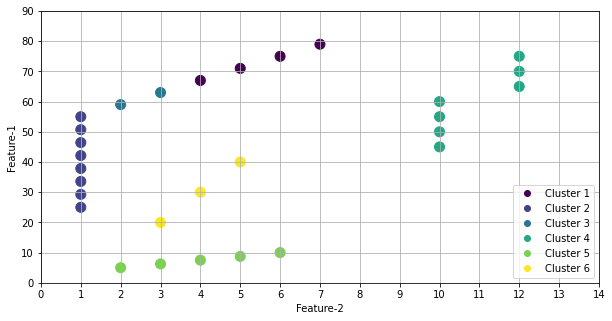

In [29]:
plt.figure(figsize=(10,5))
plt.grid()
scatter = plt.scatter(plot_data['Feature-2'],plot_data['Feature-1'],c=plot_data['label'],s=100)
plt.xlabel('Feature-2')
plt.xticks(np.arange(0, 15, 1))
plt.ylabel('Feature-1')
plt.yticks(np.arange(0, 100, 10))

plt.legend(
    handles=scatter.legend_elements()[0], 
    labels=[f'Cluster {i}' for i in range(1,7)],  
    loc='lower right'
)

plt.show()

Gaussian Mixture doesn't have any specfic measure to evaluate its performance. We can visualize and inspect that the model gave accurate performance as described in the question. It gave 6 clusters and those 6 clusters were in correct order too. We can compare it with the ground truth<br>
We chose GMM because the figure which was provided was visually known that it had clusters that were well separated. GMM assumes Gaussian shaped clusters and ours was having simple shapes.It is also highly sensitive to hyperparameters which we could tune. These made Gaussian Mixture a right candidate for our problem.<br>

When compared with DBSCAN Gaussian Mixture have the following advantages.<br>
* GMM can effectively handle clusters with varying shapes, making it a suitable choice for scenarios where clusters have non-convex boundaries, which might challenge DBSCAN.<br>
* GMM can adapt to clusters with varying densities, although it assumes Gaussian distributions. This is a contrast to DBSCAN, which requires clusters to have sufficient density.<br>
* In GMM, the number of clusters can be estimated from the data or specified by the user, whereas DBSCAN can automatically determine the number of clusters based on density.<br>
*  Both GMM and DBSCAN are sensitive to parameter tuning, but GMM's sensitivity to initialization might require more careful consideration

3. Build three ensemble models (including voting classifier) for predicting presence or absence of protein.<br>
    a. When do you want to use ensemble models over other ML models? Explain with the context of this problem.

In [30]:
%reset -f

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
df = pd.read_csv("yeast2vs4 (1).csv")
df

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative
...,...,...,...,...,...,...,...,...,...
509,0.81,0.90,0.39,0.41,0.5,0.0,0.53,0.22,positive
510,0.83,0.53,0.52,0.20,0.5,0.0,0.48,0.25,positive
511,0.78,0.48,0.47,0.30,0.5,0.0,0.53,0.47,positive
512,0.72,0.56,0.40,0.26,0.5,0.0,0.51,0.26,positive


In [33]:
df.shape

(514, 9)

The dataset contain 514 datavalues with 9 features.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     514 non-null    float64
 1   gvh     514 non-null    float64
 2   alm     514 non-null    float64
 3   mit     514 non-null    float64
 4   erl     514 non-null    float64
 5   pox     514 non-null    float64
 6   vac     514 non-null    float64
 7   nuc     514 non-null    float64
 8   class   514 non-null    object 
dtypes: float64(8), object(1)
memory usage: 36.3+ KB


In [35]:
df.isnull().sum()

mcg      0
gvh      0
alm      0
mit      0
erl      0
pox      0
vac      0
nuc      0
class    0
dtype: int64

There are no null values present and all data is in float format except the target variable which hints a classification problem.

In [36]:
df.describe().T  #5point summary

,count,mean,std,min,25%,50%,75%,max
mcg,514.0,0.504611,0.134528,0.19,0.41,0.49,0.58,0.97
gvh,514.0,0.482763,0.103216,0.21,0.42,0.47,0.55,0.90
alm,514.0,0.523463,0.075013,0.27,0.49,0.52,0.56,1.00
mit,514.0,0.232607,0.117278,0.00,0.16,0.20,0.27,1.00
erl,514.0,0.504864,0.049122,0.50,0.50,0.50,0.50,1.00
pox,514.0,0.000973,0.022054,0.00,0.00,0.00,0.00,0.50
vac,514.0,0.500467,0.063732,0.13,0.48,0.51,0.54,0.73
nuc,514.0,0.256070,0.091569,0.00,0.22,0.22,0.27,0.80


From the first view can't notice any skewness. Lets visualize the distribution.

In [37]:
#Before that lets separate target and features.
X = df.drop(columns=['class'])
y = df['class']


In [38]:
#Lets check for the target value distribution
y.value_counts()

negative    463
positive     51
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

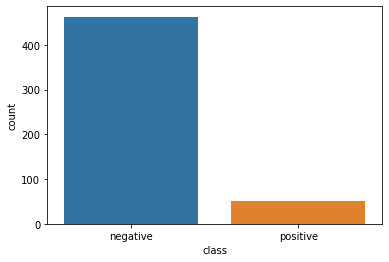

In [39]:
sns.countplot(x='class',data=df)

There is a high class imbalance in the target value and high chance for the model to be biased.


Lets build three ensemble models: RandomForestClassifier, GradientBoostingClassifier and VotingClassifier

In [40]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score,classification_report


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


In [42]:
#We are going to use loop for three ensemble methods
# Initializing individual models
rf_model = RandomForestClassifier( random_state=42)
gb_model = GradientBoostingClassifier( random_state=42)
#Voting Classifier
voting_classifier = VotingClassifier(estimators=[('rf', rf_model),('gb', gb_model),],voting='soft')

In [43]:
# Train and evaluate models
models = [rf_model, gb_model, voting_classifier]
model_names = ['Random Forest', 'Gradient Boosting', 'Voting Classifier']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"\n\n{name} Accuracy: {accuracy:.4f}\n")
    print(classification_report(y_test,predictions))



Random Forest Accuracy: 0.9612

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98        95
    positive       1.00      0.50      0.67         8

    accuracy                           0.96       103
   macro avg       0.98      0.75      0.82       103
weighted avg       0.96      0.96      0.96       103



Gradient Boosting Accuracy: 0.9612

              precision    recall  f1-score   support

    negative       0.97      0.99      0.98        95
    positive       0.83      0.62      0.71         8

    accuracy                           0.96       103
   macro avg       0.90      0.81      0.85       103
weighted avg       0.96      0.96      0.96       103



Voting Classifier Accuracy: 0.9612

              precision    recall  f1-score   support

    negative       0.97      0.99      0.98        95
    positive       0.83      0.62      0.71         8

    accuracy                           0.96       103
   macro avg      

From the above results we can see that the three ensemble models are giving same consistent accuracy. But here we cant depend on accuracy alone because of model stability. All three model is correctly predicting the majority class but since due to imbalance in data we need to look after other performance metrics such as precision,recall and f1 score.<br>
Opting correct model for our data should be done with care and in mind of the minor class,RandomForest cant be relied since recall is low eventhough high precision is there for minor class. The comparison should be between Gradient Boosting and Voting Classifier.

Ensemble models are the combination of the decisions from multiple models to improve overall predictive performance<b>(A Comprehensive Guide to Ensemble Learning (with Python codes)(2023):What is Ensemble Learning with example?)</b>. They are mostly used when a normal simple model like KNN is not able to capture the important information from the data or unable to capture the model complexities. The performance for these models will be low when used alone but an ensemble model is so powerfull the score will rise.<br>


<br>
From the context of our problem of predicting protien presence or absence we can explain it as:<br>

* If dataset is really small and contains noise individual models tends to perform weak and also it can be overfitting. Our model is relatively small and it have noises.<br>

* Our model relations are more non linear and complex such a situation is apt for ensemble models.<br>
* It is apt for real world data.<br>
* Handling high class imbalance just like in our case, the individual models will colapse and will be biased but using ensemble models like RandomForest can attain good performance score.<br>


For eg: RandomForest contains multiple Decision Tress for better performance. This DT would fail to perform well in this dataset.

    b. What are the similarities or differences between these models?

<u>Similarities</u><br>
* GradientBoosting classifier, RandomForest and Voting classifier all three are ensemble methods and they combine multiple base models to make predictions and give good result.<br>
* For our dataset all three models are giving same accuracy, which means all three are performing well.<br>
* Both Random Forest and GradientBoosting uses Decision Tree as base models. GradientBoosting sequentialluy builds series of decision trees each correcting the error of the previous ones.<br>

<u>Differences</u><br>
* RandomForest is based on bagging and random selection whereas GradientBoosting is based on boosting where models are trained sequentially to correct previous mistakes.<br>
* RandomForest is less prone to overfitting due to bagging and random feature selection but GradientBoosting often becomes more complex models.<br>
* Unlike other two models VotingClassifier combines predictions of individual models using majority votings or weighted voting strategies. And these weights are controllable by the classifier.<br>
* RandoForest is faster than the other two.<br>




    c. Is there any preferable scenario for using any specific model among the set of ensemble models?

Yes each model has it's own properties on specific scenarios. There isn;t any strict way to use which it depends on problem statement.<br>
<br>
RandomForest is apt for high dimensional data because of its random feature selection. Also large dataset is easily handled. Class imbalance is addressed.<br>

GradientBoost is used with lower dimensional data because of sequential tree adding. If we are willing to sacrifice computation power GradientBoosting can give more accurate prediction thatn RandomForest. Datasets with nonlinear data and complex data chooses this model<br>

Voting Classifier is used when we have different base models with complementary strengths. If we have different algorithms and tuning parameters then this is the right option. It is apt to combine weak models through voting to give better performance.<br>

    d. Is it possible to build ensemble model using ML classifiers other than decision tree? If yes, then explain with an example.

Yes it is possible to build ensemble model using ML classifiers other than decisoin tree. One major way to do this is by use of meta-classifiers which are trained on predictions of base classifiers just like other ensemble works. One of the popular meta classifier is Stacking Classifier. The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.<b>(Stacking Ensemble Machine Learning With Python(2020):para3)</b>

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [45]:
# Initialize base classifiers
logreg_classifier = LogisticRegression()
svm_classifier = SVC(probability=True)

In [46]:
# Initialize stacking classifier
stacking_classifier = StackingClassifier(estimators=[('logreg', logreg_classifier), 
                                                     ('svm', svm_classifier)],
                                         final_estimator=LogisticRegression())# Meta-classifier

In [47]:
# Train stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
predictions = stacking_classifier.predict(X_test)

In [48]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

Stacking Classifier Accuracy: 0.9612


Here we have used the previous dataset to show the example. We are using LogisticRegression and SVC as base classifier. The base classifiers are used to train the data and then the prediction are taken as inputs by the final estimators.

## <u>Reference List</u>

Analytics Vidhya (21 July 2023) Build Better and Accurate Clusters with Gaussian Mixture Models, accessed 19 August 2023.<br>
https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/#h-introduction-to-gaussian-mixture-models-gmms<br><br>

Analytics Vidhya (14 July 2023) A Comprehensive Guide to Ensemble Learning (with Python codes), accessed 19 August 2023.<br>
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/<br><br>

Machine Learning Mastery (10 April 2023) Stacking Ensemble Machine Learning With Python, accessed 19 August 2023.<br>
https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
